In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import zscore

In [ ]:
df = pd.read_csv(R'Ecommerce_Sales_Dataset.csv')
print(df.head())


         Date Product_Category   Price  Discount Customer_Segment  \
0  01/01/2023           Sports  932.80     35.82       Occasional   
1  02/01/2023             Toys  569.48      3.60          Premium   
2  03/01/2023       Home Decor  699.68      3.56          Premium   
3  04/01/2023             Toys  923.27      0.61          Premium   
4  05/01/2023             Toys  710.17     47.83          Premium   

   Marketing_Spend  Units_Sold  
0          6780.38          32  
1          6807.56          16  
2          3793.91          27  
3          9422.75          29  
4          1756.83          17  


In [4]:
df.duplicated().sum()  

np.int64(0)

In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
print(df.dtypes)


Date                 object
Product_Category     object
Price               float64
Discount            float64
Customer_Segment     object
Marketing_Spend     float64
Units_Sold            int64
dtype: object


Change date to datetime format for easier use

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
print(df.dtypes)

Date                datetime64[ns]
Product_Category            object
Price                      float64
Discount                   float64
Customer_Segment            object
Marketing_Spend            float64
Units_Sold                   int64
dtype: object


**Frequency**
---

Product category 

In [8]:
cat_frequency = df['Product_Category'].value_counts().sort_values()
cat_frequency

Product_Category
Home Decor     190
Fashion        190
Toys           204
Sports         206
Electronics    210
Name: count, dtype: int64

In [9]:
total_categories = df['Product_Category'].count()
relative_categories = cat_frequency / total_categories * 100
relative_categories

Product_Category
Home Decor     19.0
Fashion        19.0
Toys           20.4
Sports         20.6
Electronics    21.0
Name: count, dtype: float64

In [10]:
cat_cumulative = cat_frequency.cumsum()
cat_cumulative

Product_Category
Home Decor      190
Fashion         380
Toys            584
Sports          790
Electronics    1000
Name: count, dtype: int64

In [11]:
cat_cumulative_rel = relative_categories.cumsum()
cat_cumulative_rel

Product_Category
Home Decor      19.0
Fashion         38.0
Toys            58.4
Sports          79.0
Electronics    100.0
Name: count, dtype: float64

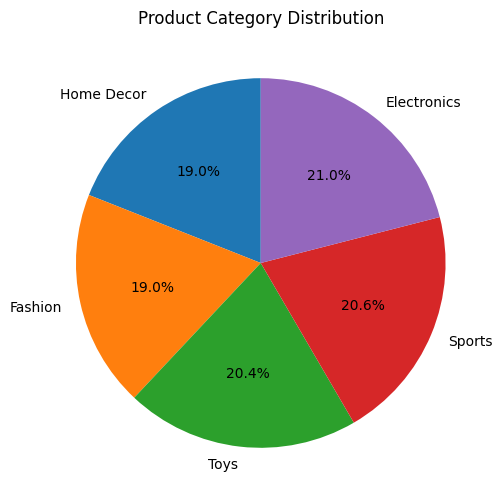

In [12]:
plt.figure(figsize=(10, 6))
plt.pie(cat_frequency, labels=cat_frequency.index, autopct='%1.1f%%', startangle=90)
plt.title('Product Category Distribution')
plt.show()
#df['Product_Category'].unique()


C:\Users\hamro\AppData\Local\Temp\ipykernel_2836\644653759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_frequency.index, y=cat_frequency.values, palette='viridis')


Text(0.5, 1.0, 'Product Category Frequency')

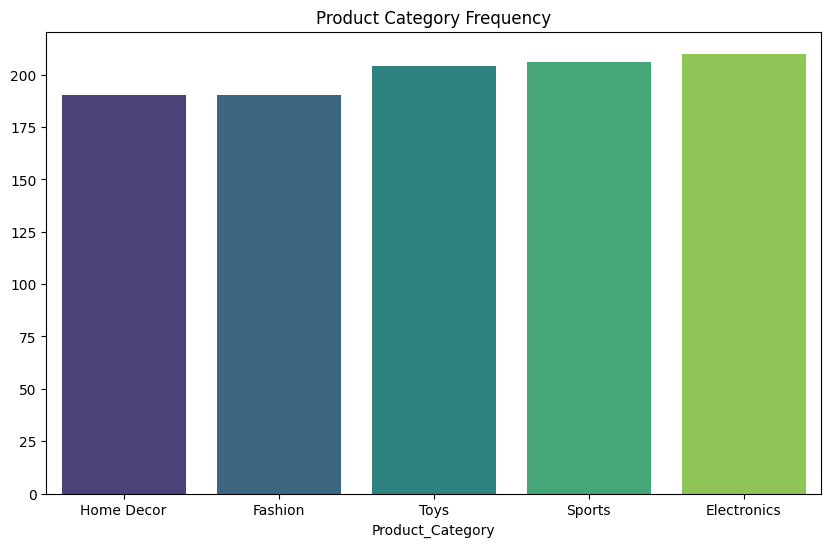

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cat_frequency.index, y=cat_frequency.values, palette='viridis')
plt.title('Product Category Frequency')


Customer segment

In [14]:
cust_frequency = df['Customer_Segment'].value_counts().sort_values()
cust_frequency

Customer_Segment
Premium       316
Occasional    339
Regular       345
Name: count, dtype: int64

In [15]:
total_cust = df['Customer_Segment'].count()
relative_cust = cust_frequency / total_cust * 100
relative_cust

Customer_Segment
Premium       31.6
Occasional    33.9
Regular       34.5
Name: count, dtype: float64

In [16]:
cust_cumulative = cust_frequency.cumsum()
cust_cumulative

Customer_Segment
Premium        316
Occasional     655
Regular       1000
Name: count, dtype: int64

In [17]:
cust_cumulative_rel = relative_cust.cumsum()
cust_cumulative_rel

Customer_Segment
Premium        31.6
Occasional     65.5
Regular       100.0
Name: count, dtype: float64

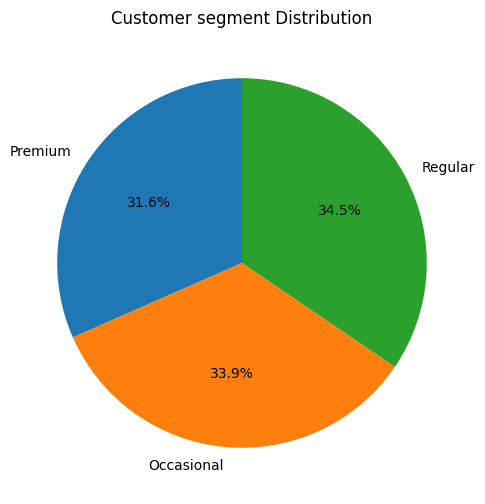

In [18]:
plt.figure(figsize=(10, 6))
plt.pie(cust_frequency, labels=cust_frequency.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer segment Distribution')
plt.show()

C:\Users\hamro\AppData\Local\Temp\ipykernel_2836\4006655389.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cust_frequency.index, y=cust_frequency.values, palette='viridis')


Text(0.5, 1.0, 'Customer segment Frequency')

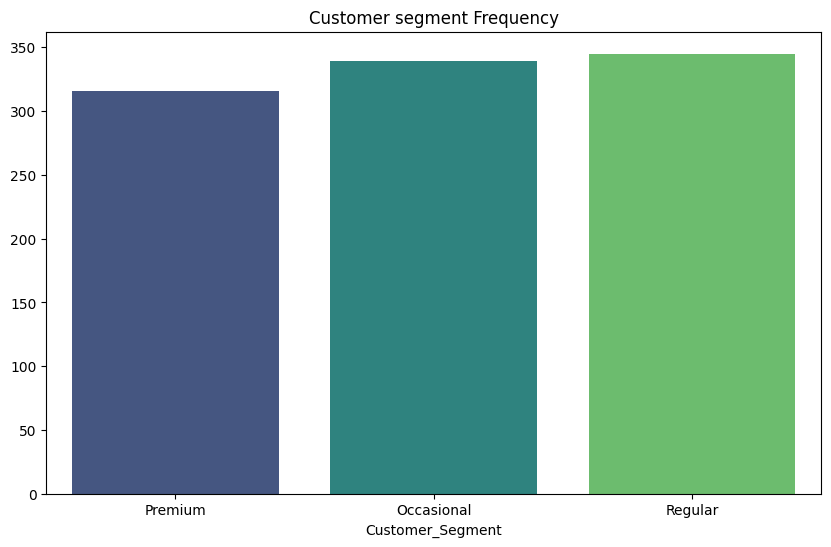

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cust_frequency.index, y=cust_frequency.values, palette='viridis')
plt.title('Customer segment Frequency')

Discount

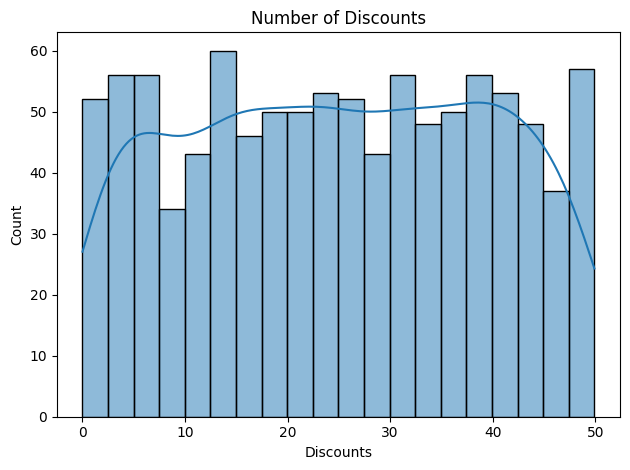

In [20]:
sns.histplot(df["Discount"], bins=20, kde=True)
plt.title("Number of Discounts")
plt.xlabel("Discounts")
plt.tight_layout()
plt.show()

Price

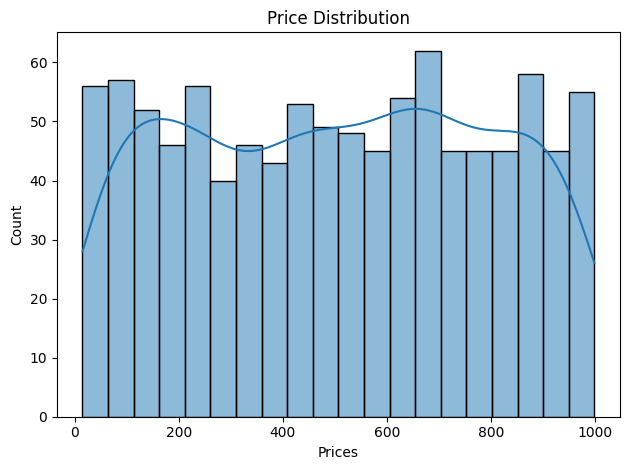

In [21]:
sns.histplot(df["Price"], bins=20, kde=True)
plt.title("Price Distribution")
plt.xlabel("Prices")
plt.tight_layout()
plt.show()

Marketing spend

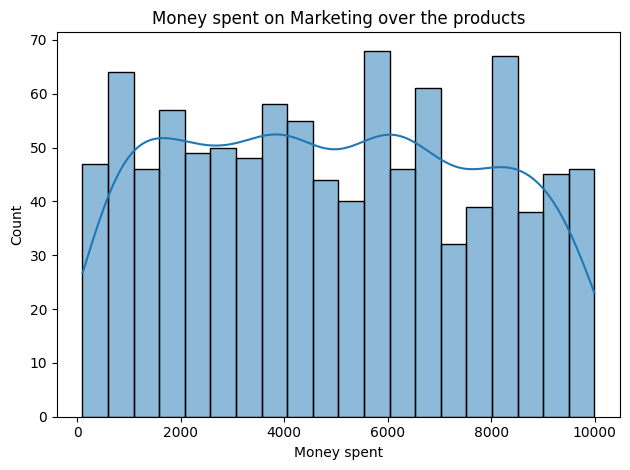

In [22]:
sns.histplot(df["Marketing_Spend"], bins=20, kde=True)
plt.title("Money spent on Marketing over the products")
plt.xlabel("Money spent")
plt.tight_layout()
plt.show()

Units_sold

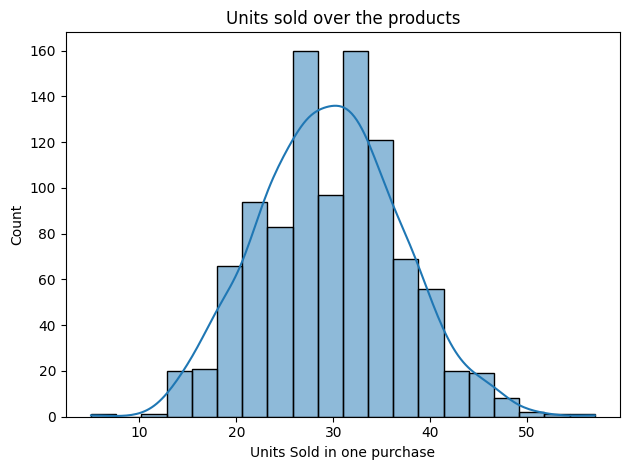

In [23]:
sns.histplot(df["Units_Sold"], bins=20, kde=True)
plt.title("Units sold over the products")
plt.xlabel("Units Sold in one purchase")
plt.tight_layout()
plt.show()

Date

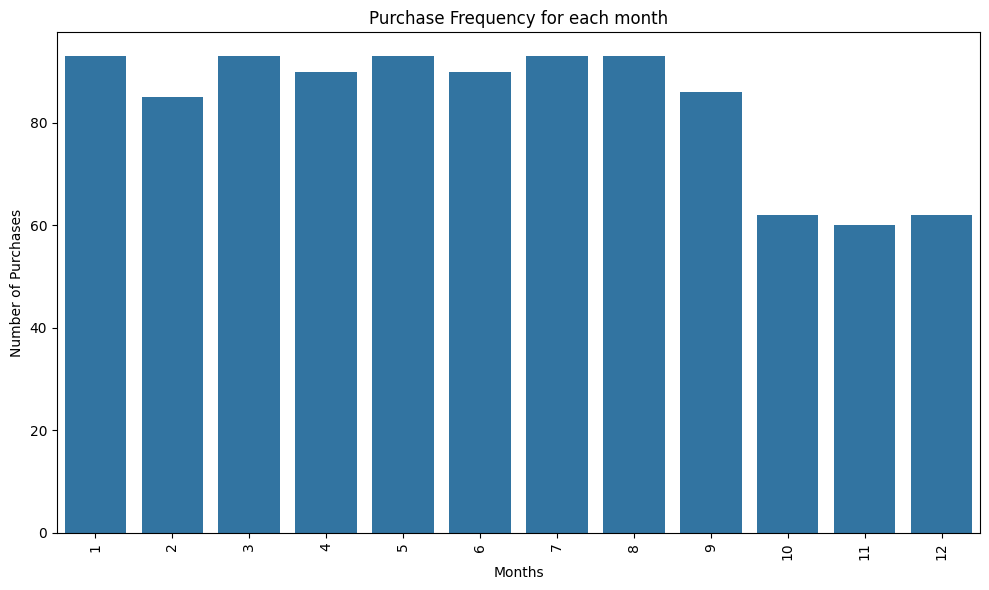

In [24]:
df2 = df.copy()
df2['Month'] = df2['Date'].dt.month
monthly_counts = df2['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.xticks(ticks=range(0, 12), labels=df2['Month'].unique(), rotation=90)
plt.title('Purchase Frequency for each month')
plt.xlabel('Months')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()

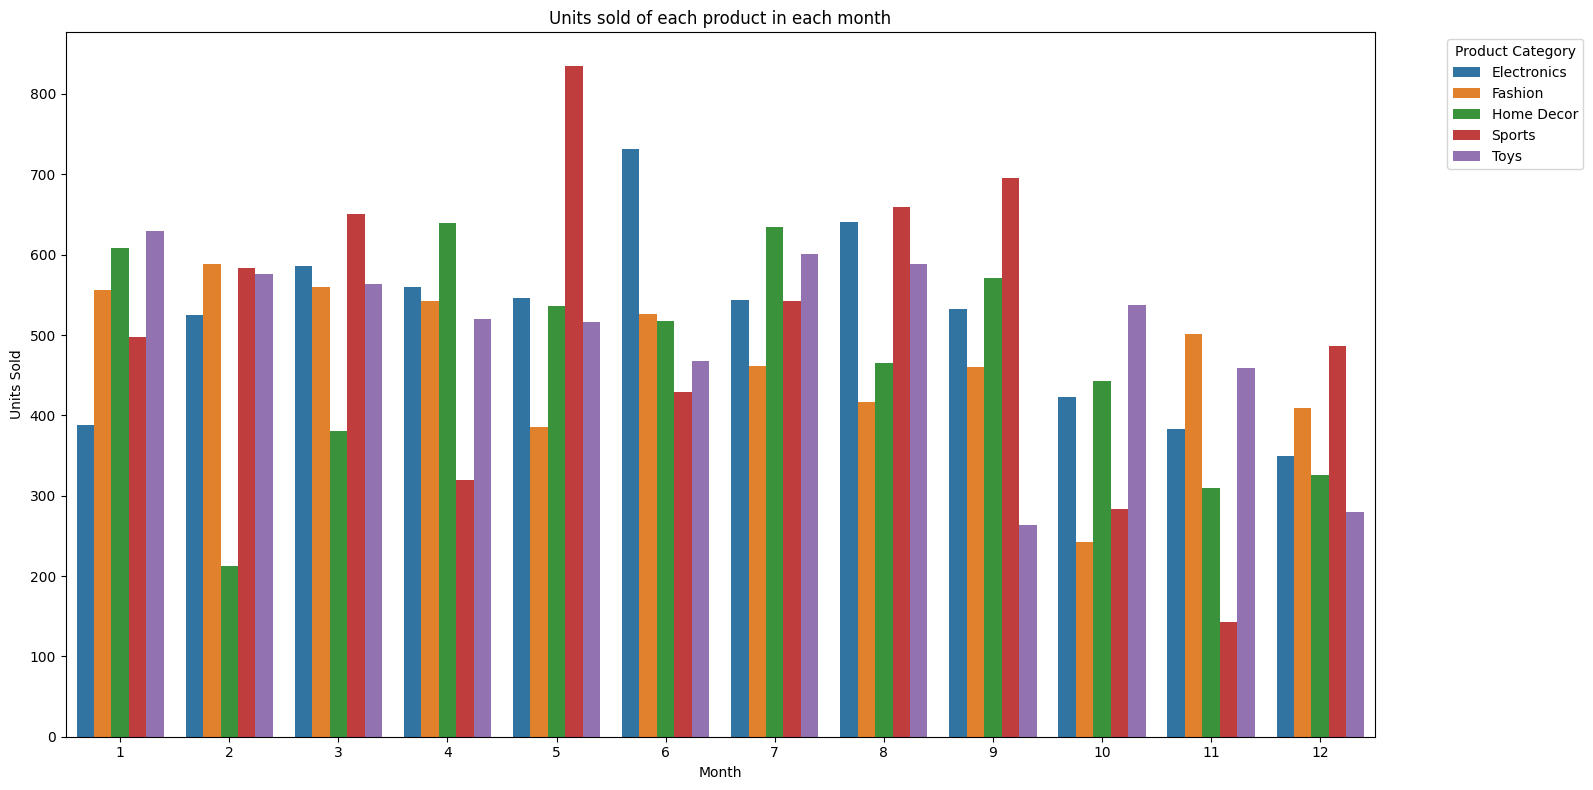

In [25]:

plt.figure(figsize=(16, 8))
sns.barplot(data=df2.groupby(['Month', 'Product_Category'])['Units_Sold'].sum().reset_index(), x='Month', y='Units_Sold', hue='Product_Category')
plt.title('Units sold of each product in each month')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(ticks=range(0, 12), labels=df2['Month'].unique())
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Central tendency
---

Price

In [26]:
mean_price = df['Price'].mean()
median_price = df['Price'].median()
print("Mean price:",mean_price)
print("Median price:",median_price)
mode_price = df['Price'].mode()[0]  
print("Mode of price:",mode_price)



Mean price: 505.24192
Median price: 509.31
Mode of price: 113.07


Discount

In [27]:
mean_Discount = df['Discount'].mean()
median_Discount = df['Discount'].median()
print("Discount mean:",mean_Discount)
print("Discount median:",median_Discount)
mode_Discount = df['Discount'].mode()[0]  
print("Mode of Discount:",mode_Discount)

Discount mean: 24.91975
Discount median: 24.965
Mode of Discount: 23.2


Marketing spend

In [28]:
mean_Marketing_Spend = df['Marketing_Spend'].mean()
median_Marketing_Spend = df['Marketing_Spend'].median()
print("Marketing spend mean:",mean_Marketing_Spend)
print("Marketing spend median:",median_Marketing_Spend)
mode_Marketing_Spend = df['Marketing_Spend'].mode()[0]  
print("Mode of Marketing spend:",mode_Marketing_Spend)

Marketing spend mean: 4912.830239999999
Marketing spend median: 4837.245000000001
Mode of Marketing spend: 100.3


Units sold

In [29]:
mean_Units_Sold = df['Units_Sold'].mean()
median_Units_Sold = df['Units_Sold'].median()
print("Units sold mean:",mean_Units_Sold)
print("Units sold median:",median_Units_Sold)
mode_Units_Sold = df['Units_Sold'].mode()[0]  
print("Mode of Units sold:",mode_Units_Sold)

Units sold mean: 29.631
Units sold median: 30.0
Mode of Units sold: 31


Measures of Dispersion
---

**Range**

Price

In [30]:
min_Price= df['Price'].min()
max_Price= df['Price'].max()

range_of_Price = max_Price- min_Price

print("Max:", max_Price)
print("Min:", min_Price)
print("Range of price:",range_of_Price)


Max: 999.42
Min: 14.59
Range of price: 984.8299999999999


Marketing spent

In [31]:
min_Marketing_Spend= df['Marketing_Spend'].min()
max_Marketing_Spend= df['Marketing_Spend'].max()

range_of_Marketing_Spend = max_Marketing_Spend- min_Marketing_Spend

print("Max:", max_Marketing_Spend)
print("Min:", min_Marketing_Spend)
print("Range of Marketing Spent:",range_of_Marketing_Spend)


Max: 9995.62
Min: 100.3
Range of Marketing Spent: 9895.320000000002


Discount

In [32]:
min_Discount= df['Discount'].min()
max_Discount= df['Discount'].max()

range_of_Discount = max_Discount- min_Discount

print("Max:", max_Discount)
print("Min:", min_Discount)
print("Range of Discounts:",range_of_Discount)


Max: 49.92
Min: 0.01
Range of Discounts: 49.910000000000004


Units sold

In [33]:
min_Units_Sold= df['Units_Sold'].min()
max_Units_Sold= df['Units_Sold'].max()

range_of_Units_Sold = max_Units_Sold- min_Units_Sold

print("Max:", max_Units_Sold)
print("Min:", min_Units_Sold)
print("Range of Units Sold:",range_of_Units_Sold)

Max: 57
Min: 5
Range of Units Sold: 52


**Variance**

Price

In [34]:
variance_Price = df['Price'].var()
print(variance_Price)

83978.96748680041


Marketing spent

In [35]:
variance_Marketing= df['Marketing_Spend'].var()
print(variance_Marketing)

8069023.450214757


Discount

In [36]:
variance_Discount = df['Discount'].var()
print(variance_Discount)


208.51219343093092


Units sold

In [37]:
variance_US = df['Units_Sold'].var()
print(variance_US)


52.82366266266266


**Standard deviation**

Price

In [38]:
std_Price = df['Price'].std()
print(std_Price)


289.7912481197464


Marketing spent

In [39]:
std_Marketing_Spend = df['Marketing_Spend'].std()
print(std_Marketing_Spend)


2840.6026561655463


Discount

In [40]:
std_Discount = df['Discount'].std()
print(std_Discount)

14.43995129600273


Units sold

In [41]:
std_Units_Sold = df['Units_Sold'].std()
print(std_Units_Sold)

7.267988900835132


**Interquartile range**

Price

In [42]:
Q1_Price = df['Price'].quantile(0.25)
Q3_Price = df['Price'].quantile(0.75)
IQR_Price = Q3_Price - Q1_Price
print("Q1 Price:", Q1_Price)
print("Q3 Price:", Q3_Price)
print("IQR Price:", IQR_Price)

Q1 Price: 243.3425
Q3 Price: 747.5925
IQR Price: 504.25


Marketing spent

In [43]:
Q1_Marketing_Spend = df['Marketing_Spend'].quantile(0.25)
Q3_Marketing_Spend = df['Marketing_Spend'].quantile(0.75)
IQR_Marketing_Spend = Q3_Marketing_Spend - Q1_Marketing_Spend
print("Q1_Marketing_Spend:", Q1_Marketing_Spend)
print("Q3_Marketing_Spend:", Q3_Marketing_Spend)
print("IQR_Marketing_Spend:", IQR_Marketing_Spend)

Q1_Marketing_Spend: 2413.02
Q3_Marketing_Spend: 7319.675
IQR_Marketing_Spend: 4906.655000000001


Discount

In [44]:
Q1_Discount = df['Discount'].quantile(0.25)
Q3_Discount = df['Discount'].quantile(0.75)
IQR_Discount = Q3_Discount - Q1_Discount
print("Q1_Discount:", Q1_Discount)
print("Q3_Discount:", Q3_Discount)
print("IQR_Discount:", IQR_Discount)

Q1_Discount: 12.995000000000001
Q3_Discount: 37.5625
IQR_Discount: 24.5675


Units sold

In [45]:
Q1_Units_Sold= df['Units_Sold'].quantile(0.25)
Q3_Units_Sold= df['Units_Sold'].quantile(0.75)
IQR_Units_Sold= Q3_Units_Sold- Q1_Units_Sold
print("Q1_Units_Sold:", Q1_Units_Sold)
print("Q3_Units_Sold:", Q3_Units_Sold)
print("IQR_Units_Sold:", IQR_Units_Sold)

Q1_Units_Sold: 24.0
Q3_Units_Sold: 34.0
IQR_Units_Sold: 10.0


**Coefficient of Variation**

Price

In [46]:
cv_Price = std_Price / mean_price * 100
print(cv_Price)

57.35692875993868


Marketing spent

In [47]:
cv_Marketing_Spend = std_Marketing_Spend / mean_Marketing_Spend * 100
print(cv_Marketing_Spend)

57.82008572243169


Discount

In [48]:
cv_Discount = std_Discount / mean_Discount * 100
print(cv_Discount)

57.94581123808518


Units sold

In [49]:
cv_Units_Sold = std_Units_Sold / mean_Units_Sold * 100
print(cv_Units_Sold)

24.528328105143707


Measure of position
---

Price 

In [ ]:
percentiles_Price = np.percentile(df['Price'], [10, 25, 50, 75, 90])

z_scores_Price = stats.zscore(df['Price'])
z_score_range_Price = (float(z_scores_Price.min()), float(z_scores_Price.max()))

print("Percentiles of Price:", percentiles_Price)
print("Z score of price:", z_score_range_Price)




Percentiles of Price: [100.365  243.3425 509.31   747.5925 899.265 ]
Z score of price: (-1.69396913569, 1.7061431555277387)


Marketing spent

In [51]:
percentiles_Marketing_Spend = np.percentile(df['Marketing_Spend'], [10, 25, 50, 75, 90])

z_scores_Marketing_Spend = stats.zscore(df['Marketing_Spend'])
z_score_range_Marketing_Spend = (float(z_scores_Marketing_Spend.min()), float(z_scores_Marketing_Spend.max()))

print("Percentiles of Marketing_Spend:", percentiles_Marketing_Spend)
print("Z score of Marketing_Spend:", z_score_range_Marketing_Spend)

Percentiles of Marketing_Spend: [ 960.594 2413.02  4837.245 7319.675 8876.504]
Z score of Marketing_Spend: (-1.6950411212470065, 1.7902303412545844)


Discount

In [52]:
percentiles_Discount = np.percentile(df['Discount'], [10, 25, 50, 75, 90])

z_scores_Discount = stats.zscore(df['Discount'])
z_score_range_Discount = (float(z_scores_Discount.min()), float(z_scores_Discount.max()))

print("Percentiles of Discount:", percentiles_Discount)
print("Z score of Discount:", z_score_range_Discount)

Percentiles of Discount: [ 4.422  12.995  24.965  37.5625 44.51  ]
Z score of Discount: (-1.725920933739322, 1.7321914039167992)


Units sold

In [53]:
percentiles_Units_Sold = np.percentile(df['Units_Sold'], [10, 25, 50, 75, 90])

z_scores_Units_Sold = stats.zscore(df['Units_Sold'])
z_score_range_Units_Sold = (float(z_scores_Units_Sold.min()), float(z_scores_Units_Sold.max()))

print("Percentiles of Units_Sold:", percentiles_Units_Sold)
print("Z score of Units_Sold:", z_score_range_Units_Sold)

Percentiles of Units_Sold: [20. 24. 30. 34. 39.]
Z score of Units_Sold: (-3.3906662600292736, 3.7675752048532822)


**Box plot**

Price

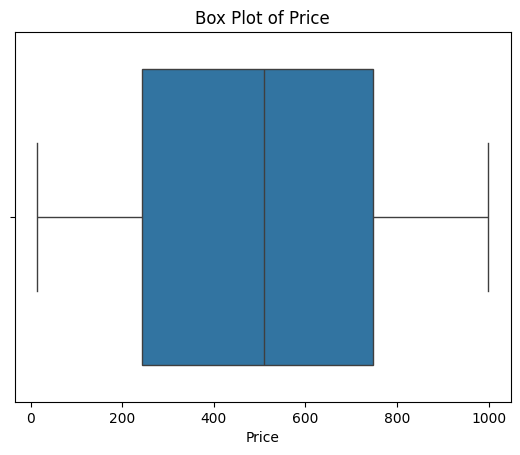

In [ ]:
sns.boxplot(x=df['Price'])

plt.title("Box Plot of Price")
plt.xlabel("Price")
plt.show()

Marketing spent

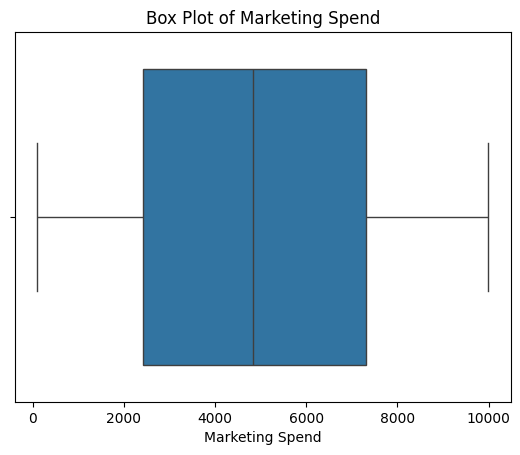

In [55]:
sns.boxplot(x=df['Marketing_Spend'])

plt.title("Box Plot of Marketing Spend")
plt.xlabel("Marketing Spend")
plt.show()

Discount

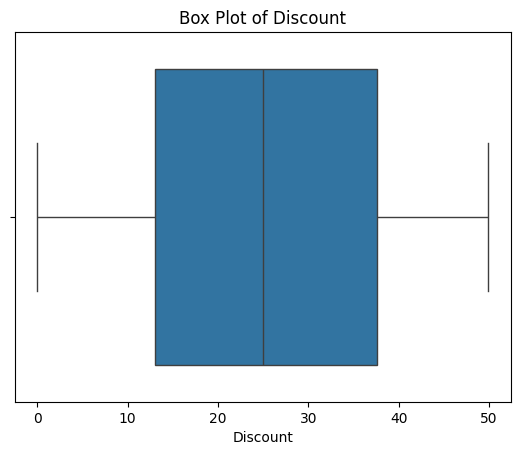

In [56]:
sns.boxplot(x=df['Discount'])

plt.title("Box Plot of Discount")
plt.xlabel("Discount")
plt.show()

Units

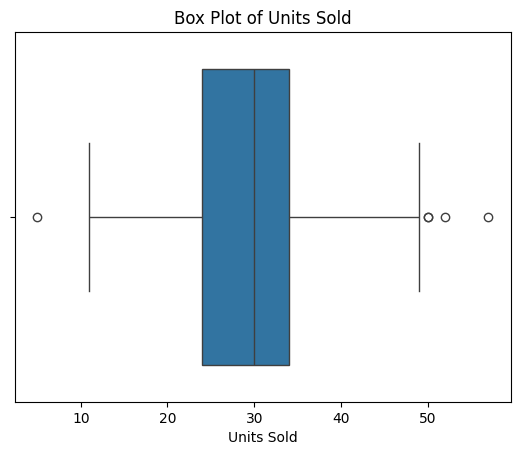

In [ ]:
sns.boxplot(x=df['Units_Sold'])

plt.title("Box Plot of Units Sold")
plt.xlabel("Units Sold")
plt.show()

Outlier detection
---

*All box plots shown above help with outlier detection, there are no clear outliers except in units sold, which is the target value.*

In [58]:
z_scores = stats.zscore(df['Units_Sold'])
threshold = 3
outliers = df[np.abs(z_scores) > threshold]
print(outliers)

          Date Product_Category   Price  Discount Customer_Segment  \
261 2023-09-19       Home Decor  407.91     20.59       Occasional   
522 2024-06-06           Sports   90.81     21.09       Occasional   
641 2024-10-03             Toys  707.63     17.02       Occasional   

     Marketing_Spend  Units_Sold  
261          7091.84           5  
522          7123.44          52  
641          4837.43          57  


In [59]:
lower_bound = Q1_Units_Sold - 1.5 * IQR_Units_Sold
upper_bound = Q3_Units_Sold + 1.5 * IQR_Units_Sold
outliers = df[(df['Units_Sold'] < lower_bound) | (df['Units_Sold'] > upper_bound)]
print("Number of outliers:", len(outliers))
print(outliers)



Number of outliers: 5
          Date Product_Category   Price  Discount Customer_Segment  \
138 2023-05-19          Fashion  179.96     33.82       Occasional   
261 2023-09-19       Home Decor  407.91     20.59       Occasional   
522 2024-06-06           Sports   90.81     21.09       Occasional   
544 2024-06-28      Electronics  265.11     37.56       Occasional   
641 2024-10-03             Toys  707.63     17.02       Occasional   

     Marketing_Spend  Units_Sold  
138          2044.55          50  
261          7091.84           5  
522          7123.44          52  
544          4476.86          50  
641          4837.43          57  


*IQR is more reliable as the distribution of data is skewed*

Relationships
---

Corrolation heatmap

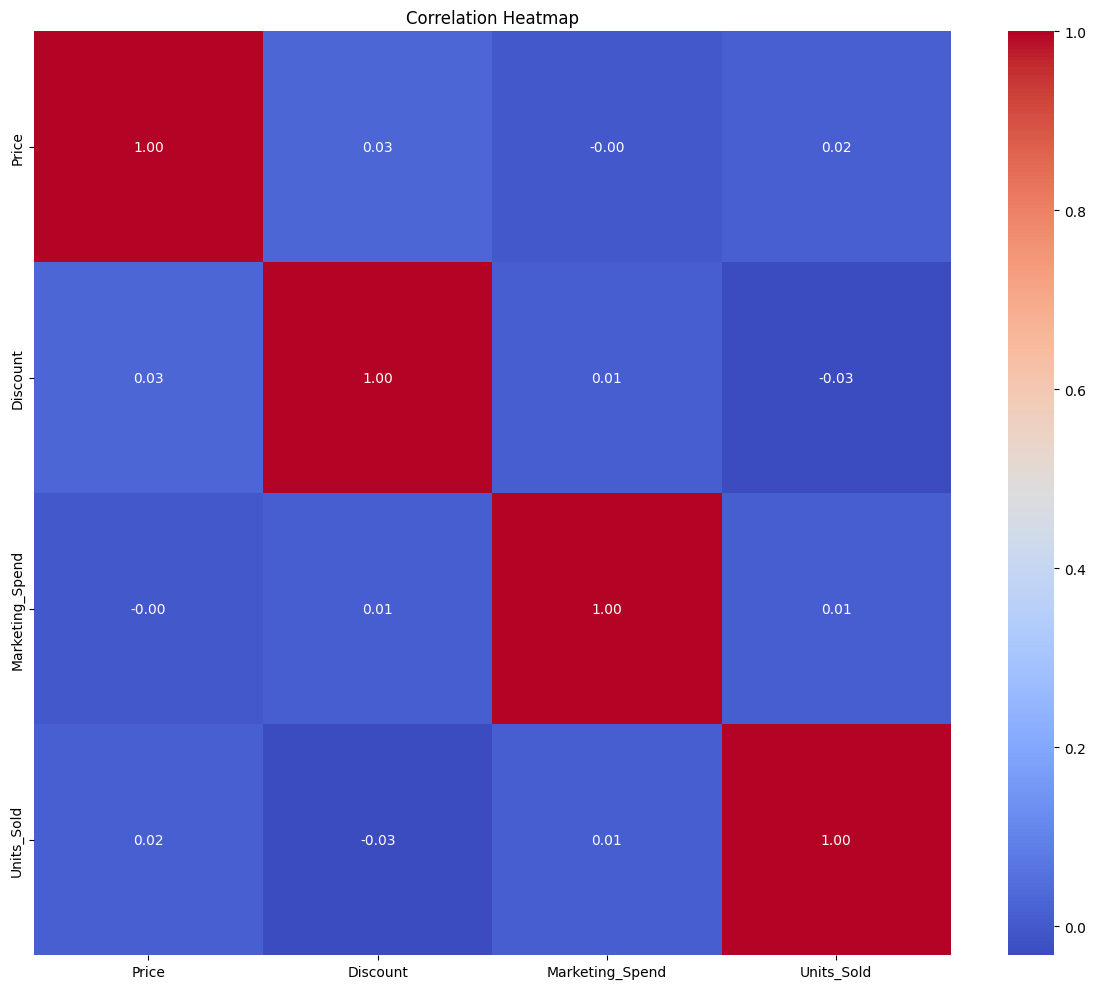

In [60]:
df2 = df.copy()
df2 = df2.select_dtypes(include=[np.number])
corr = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Different plots

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Sports'),
  Text(1, 0, 'Toys'),
  Text(2, 0, 'Home Decor'),
  Text(3, 0, 'Fashion'),
  Text(4, 0, 'Electronics')])

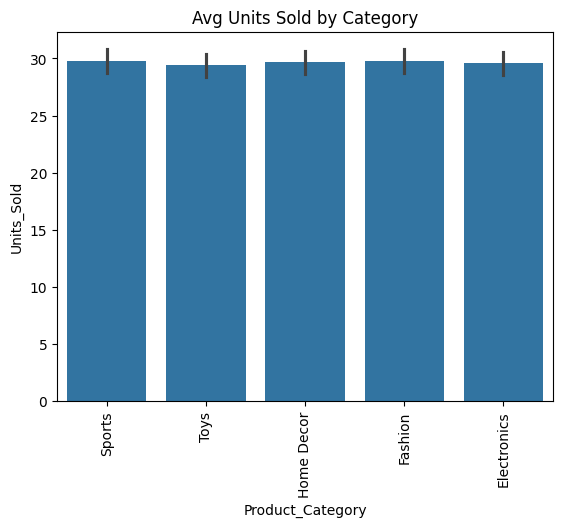

In [61]:
sns.barplot(x='Product_Category', y='Units_Sold', data=df, estimator='mean')
plt.title("Avg Units Sold by Category") 
plt.xticks(rotation=90)

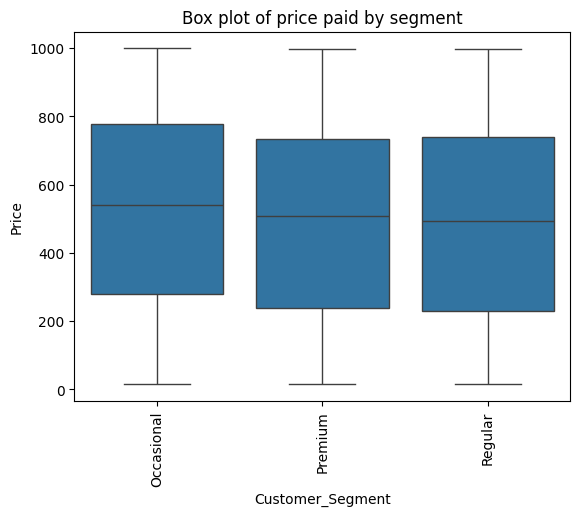

In [62]:
sns.boxplot(x='Customer_Segment', y='Price', data=df)
plt.title("Box plot of price paid by segment")
plt.xticks(rotation=90)
plt.show()

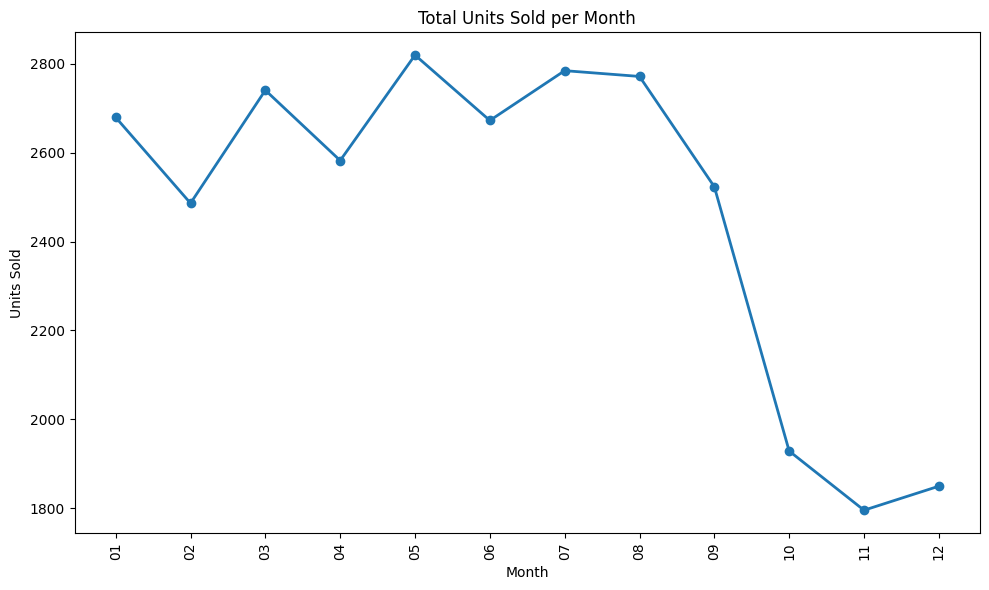

In [63]:
df2['Month'] = df['Date'].dt.strftime('%m')
monthly_units = df2.groupby('Month')['Units_Sold'].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_units.index, monthly_units.values, marker='o', linestyle='-', linewidth=2)
plt.title('Total Units Sold per Month')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Relationships between categorical columns

In [64]:
count_ct = pd.crosstab(df['Customer_Segment'], df['Product_Category'], margins =True, margins_name="Total")
print(count_ct)

Product_Category  Electronics  Fashion  Home Decor  Sports  Toys  Total
Customer_Segment                                                       
Occasional                 66       67          69      62    75    339
Premium                    62       60          59      68    67    316
Regular                    82       63          62      76    62    345
Total                     210      190         190     206   204   1000
